In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from EM import EM

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

In [3]:
# define colors in a hash table
colors = {1: 'b', 2: 'g', 3: 'r', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: 'w', 9: '#FFA500', 10: '#006400'}

In [4]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

In [5]:
# train the EM model
m = 3
em = EM(m=m, threshold=0.0001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, E = em.get_params()
# get the label
label = em.get_label()

Reach the threshold at 26 th iteration !


In [6]:
print('w:\t', np.round(w, 5))
print('\nmu:\t', np.round(mu, 5))
print('\nsigma:\t', np.round(sigma, 5))

w:	 [ 0.27347  0.30195  0.42458]

mu:	 [[  3.62830000e-01   3.42000000e-01   9.73100000e-02]
 [  7.69200000e-01   6.00840000e-01   4.22680000e-01]
 [  3.67790000e-01   4.11980000e-01   7.30000000e-04]]

sigma:	 [[[ 0.03995  0.03396  0.01339]
  [ 0.03396  0.03675  0.00716]
  [ 0.01339  0.00716  0.01184]]

 [[ 0.02044  0.02225  0.02387]
  [ 0.02225  0.02629  0.03007]
  [ 0.02387  0.03007  0.03727]]

 [[ 0.03586  0.037   -0.00027]
  [ 0.037    0.04156 -0.0003 ]
  [-0.00027 -0.0003   0.     ]]]


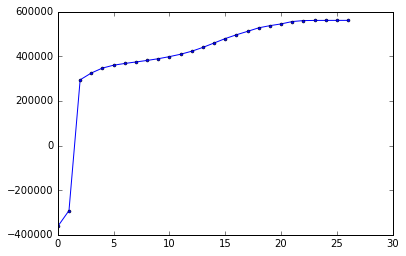

In [7]:
plt.plot(E, 'o-', markersize=3)
plt.show()

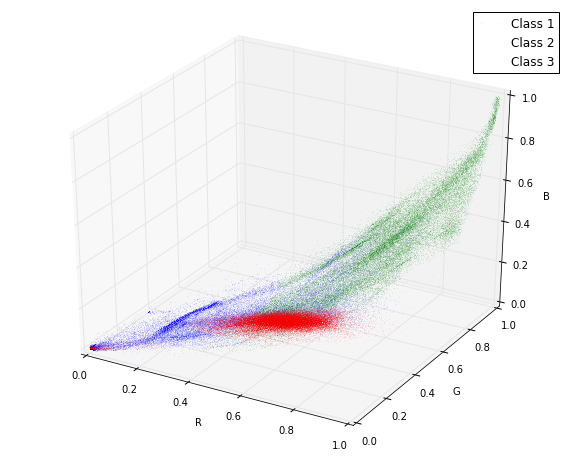

In [8]:
# %matplotlib qt
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

In [ ]:
# def pdf_multivariate_gauss(x, mu, cov):
#     '''
#     Caculate the multivariate normal density (pdf)

#     Keyword arguments:
#         x = numpy array of a "d x 1" sample vector
#         mu = numpy array of a "d x 1" mean vector
#         cov = "numpy array of a d x d" covariance matrix
#     '''
#     assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
#     assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
#     assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
#     assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
#     assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
#     part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
#     part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
#     return float(part1 * np.exp(part2))